In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-23-complete-player-database/fifa_23_280922.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/fifa-23-complete-player-database/fifa_23_280922.csv")
data.head()

,Nom,Général,Potentiel,Performance,Pays,Club,Bon pied,Mauvais pied,Gestes techniques,Taille,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


In [4]:
data.tail()

,Nom,Général,Potentiel,Performance,Pays,Club,Bon pied,Mauvais pied,Gestes techniques,Taille,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
18441,Huo Liang,49,49,49.0,China PR,Meizhou Hakka,Right,3,2,179,...,33,38,51,53,51,7,10,8,14,7
18442,Zhou Zheng,46,51,48.5,China PR,Tianjin Jinmen Tiger FC,Right,3,2,182,...,41,44,38,35,44,7,8,7,12,15
18443,N. Rabha,47,50,48.5,India,NorthEast United FC,Left,3,2,176,...,35,32,47,44,43,13,13,6,14,14
18444,Ning Hao,48,48,48.0,China PR,Dalian Professional Football Club,Right,3,2,175,...,49,58,34,40,40,9,14,15,12,13
18445,D. Duffy,35,49,42.0,Republic of Ireland,Finn Harps,Left,2,2,169,...,34,36,41,47,48,11,9,10,6,11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18446 entries, 0 to 18445
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nom                   18446 non-null  object 
 1   Général               18446 non-null  int64  
 2   Potentiel             18446 non-null  int64  
 3   Performance           18446 non-null  float64
 4   Pays                  18446 non-null  object 
 5   Club                  18446 non-null  object 
 6   Bon pied              18446 non-null  object 
 7   Mauvais pied          18446 non-null  int64  
 8   Gestes techniques     18446 non-null  int64  
 9   Taille                18446 non-null  int64  
 10  Rendement offensif    18446 non-null  object 
 11  Rendement defensif    18446 non-null  object 
 12  Valeur                18446 non-null  object 
 13  Salaire               18446 non-null  object 
 14  Id                    18446 non-null  int64  
 15  Centres            

In [6]:
list(data.columns)

['Nom',
 'Général',
 'Potentiel',
 'Performance',
 'Pays',
 'Club',
 'Bon pied',
 'Mauvais pied',
 'Gestes techniques',
 'Taille',
 'Rendement offensif',
 'Rendement defensif',
 'Valeur',
 'Salaire',
 'Id',
 'Centres',
 'Finition',
 'Precision tete',
 'Passes courtes',
 'Volee',
 'Dribbles',
 'Effet',
 'PCF',
 'Passes longues',
 'Controle',
 'Acceleration',
 'Vitesse',
 'Agilite',
 'Reactivite',
 'Equilibre',
 'Puissance frappe',
 'Detente',
 'Endurance',
 'Force',
 'Tirs de loin',
 'Agressivite',
 'Interceptions',
 'Placement',
 'Vista',
 'Penalty',
 'Calme',
 'Conscience defensive',
 'Tacle debout',
 'Tacle glisse',
 'Plongeon',
 'Jeu main',
 'Jeu pied',
 'Placement.1',
 'Reflexes']

In [7]:
data.rename(columns = {'Nom':'Name','Pays':'Country','Club':'FootballClub','Bon pied':'Preferred Foot'}, inplace = True)
data.head()

,Name,Général,Potentiel,Performance,Country,FootballClub,Preferred Foot,Mauvais pied,Gestes techniques,Taille,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


In [8]:
data.describe()

,Général,Potentiel,Performance,Mauvais pied,Gestes techniques,Taille,Id,Centres,Finition,Precision tete,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
count,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,...,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.00000
mean,65.760273,70.942589,68.351431,2.944216,2.362789,181.549821,237020.339803,49.388431,46.185406,51.763146,...,47.940312,57.929470,46.635910,48.289439,46.169197,16.407948,16.163396,16.071452,16.214030,16.48211
std,6.790877,6.184479,5.908524,0.672973,0.770640,6.855294,26780.215193,17.873496,19.602205,17.302473,...,15.723659,12.033389,20.333755,21.165062,20.671360,17.584338,16.919486,16.679385,17.081935,17.92404
min,35.000000,48.000000,42.000000,1.000000,1.000000,155.000000,1179.000000,6.000000,3.000000,5.000000,...,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.00000
25%,62.000000,67.000000,64.500000,3.000000,2.000000,177.000000,221606.250000,39.000000,31.000000,44.000000,...,39.000000,51.000000,29.000000,28.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.00000
50%,66.000000,71.000000,68.000000,3.000000,2.000000,182.000000,241239.500000,54.000000,50.000000,55.000000,...,49.000000,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.00000
75%,70.000000,75.000000,72.000000,3.000000,3.000000,186.000000,259129.750000,63.000000,62.000000,64.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.00000
max,91.000000,95.000000,93.000000,5.000000,5.000000,206.000000,271897.000000,94.000000,94.000000,93.000000,...,92.000000,96.000000,92.000000,93.000000,90.000000,90.000000,90.000000,93.000000,91.000000,90.00000


In [9]:
data['FootballClub'].unique()

array(['Paris Saint-Germain', 'FC Barcelona', 'Real Madrid CF',
       'Manchester City', 'Atlético de Madrid', 'Liverpool',
       'FC Bayern München', 'Manchester United', 'Tottenham Hotspur',
       'Chelsea', 'AC Milan', 'Inter', 'France', 'Borussia Dortmund',
       'Juventus', 'Arsenal', 'Bayer 04 Leverkusen', 'Lazio',
       'Villarreal CF', 'Napoli', 'Germany', 'Roma', 'West Ham United',
       'Croatia', 'Leicester City', 'PSV', 'RC Celta de Vigo', 'Hungary',
       'Borussia Mönchengladbach', 'Real Betis Balompié', 'Sevilla FC',
       'Real Sociedad', 'Spain', 'Athletic Club de Bilbao',
       'Wolverhampton Wanderers', 'VfL Wolfsburg', 'TSG Hoffenheim',
       'Sporting CP', 'Ajax', 'Galatasaray SK',
       'Club Nacional de Football', 'Italy', 'Los Angeles FC',
       'Aston Villa', 'Newcastle United', 'AS Monaco', 'Austria', 'None',
       'OGC Nice', 'Eintracht Frankfurt', 'Leeds United', 'Portugal',
       'Olympique de Marseille', 'Atalanta', 'Palmeiras', 'Everton',
  

In [10]:
data[data["Country"] == "Argentina"]["Name"]


3            L. Messi
34        L. Martínez
90          P. Dybala
98          C. Romero
128          M. Acuña
             ...     
16987        N. Femia
16992     D. Gallardo
17179    A. Steimbach
17245         L. Cano
17443      L. Garnier
Name: Name, Length: 933, dtype: object

In [11]:
data[data["FootballClub"] == "Paris Saint-Germain"]["Name"]

0            K. Mbappé
3             L. Messi
12       G. Donnarumma
20           Neymar Jr
22          Marquinhos
36            K. Navas
57         M. Verratti
93           A. Hakimi
100       Carlos Soler
143        P. Kimpembe
164        Nuno Mendes
166            Vitinha
178       Sergio Ramos
199        Fabián Ruiz
277     Renato Sanches
440         N. Mukiele
442      Pablo Sarabia
560         H. Ekitike
659     Danilo Pereira
1138       Juan Bernat
1462       Sergio Rico
2031        T. Pembélé
5514         I. Gharbi
5600      E. Bitshiabu
8828         K. Nagera
9214      A. Letellier
Name: Name, dtype: object

In [12]:
data[data["FootballClub"] == "Manchester United"]["Name"]

11       Cristiano Ronaldo
18                Casemiro
58                  De Gea
75               J. Sancho
91         Bruno Fernandes
110                 Antony
146              R. Varane
210            L. Martínez
245            M. Rashford
303             T. Malacia
311             C. Eriksen
384             A. Martial
401         D. van de Beek
413         A. Wan-Bissaka
423           S. McTominay
425             H. Maguire
490            Diogo Dalot
535            V. Lindelöf
570                L. Shaw
613                   Fred
690            M. Dúbravka
728              A. Elanga
1703          F. Pellistri
1731           A. Tuanzebe
2131           B. Williams
2569    Alejandro Garnacho
2630            D. Bernard
3342          S. Shoretire
3578              P. Jones
3603              T. Mengi
3679             T. Heaton
5610              Z. Iqbal
6385             C. Savage
Name: Name, dtype: object

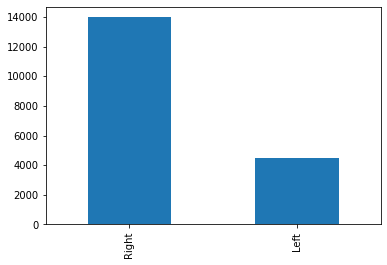

In [13]:
data["Preferred Foot"].value_counts().plot(kind = 'bar');

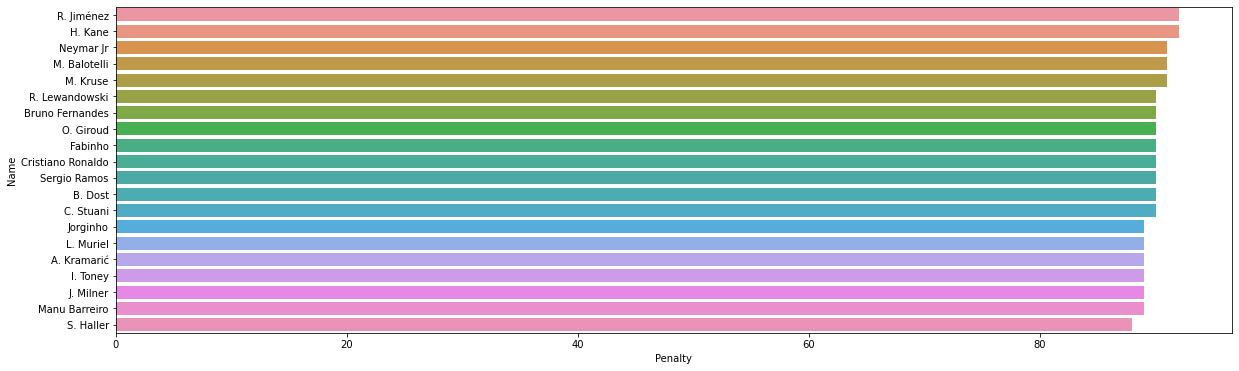

In [14]:
data = data.sort_values(by = ['Penalty'], ascending = False)
plt.figure(figsize = (20, 6))
sns.barplot(x = data["Penalty"], y = data["Name"][:20]);

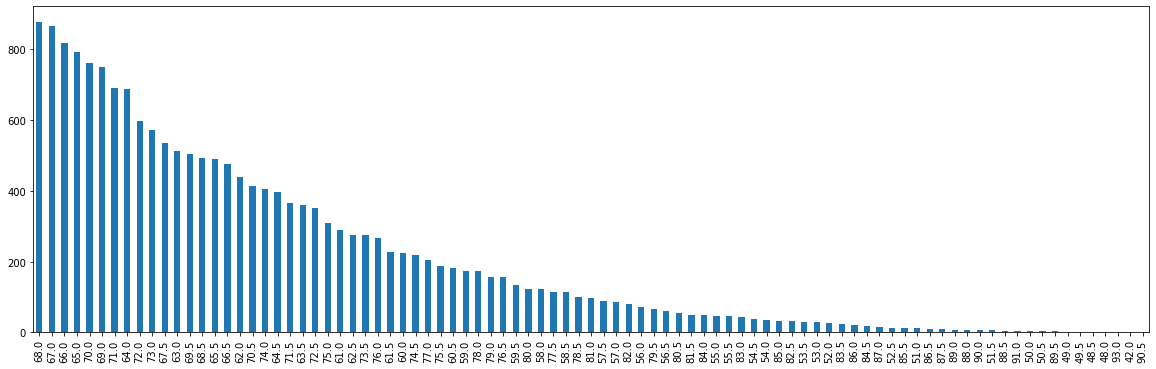

In [15]:
plt.figure(figsize = (20, 6))
data["Performance"].value_counts().plot(kind = 'bar');

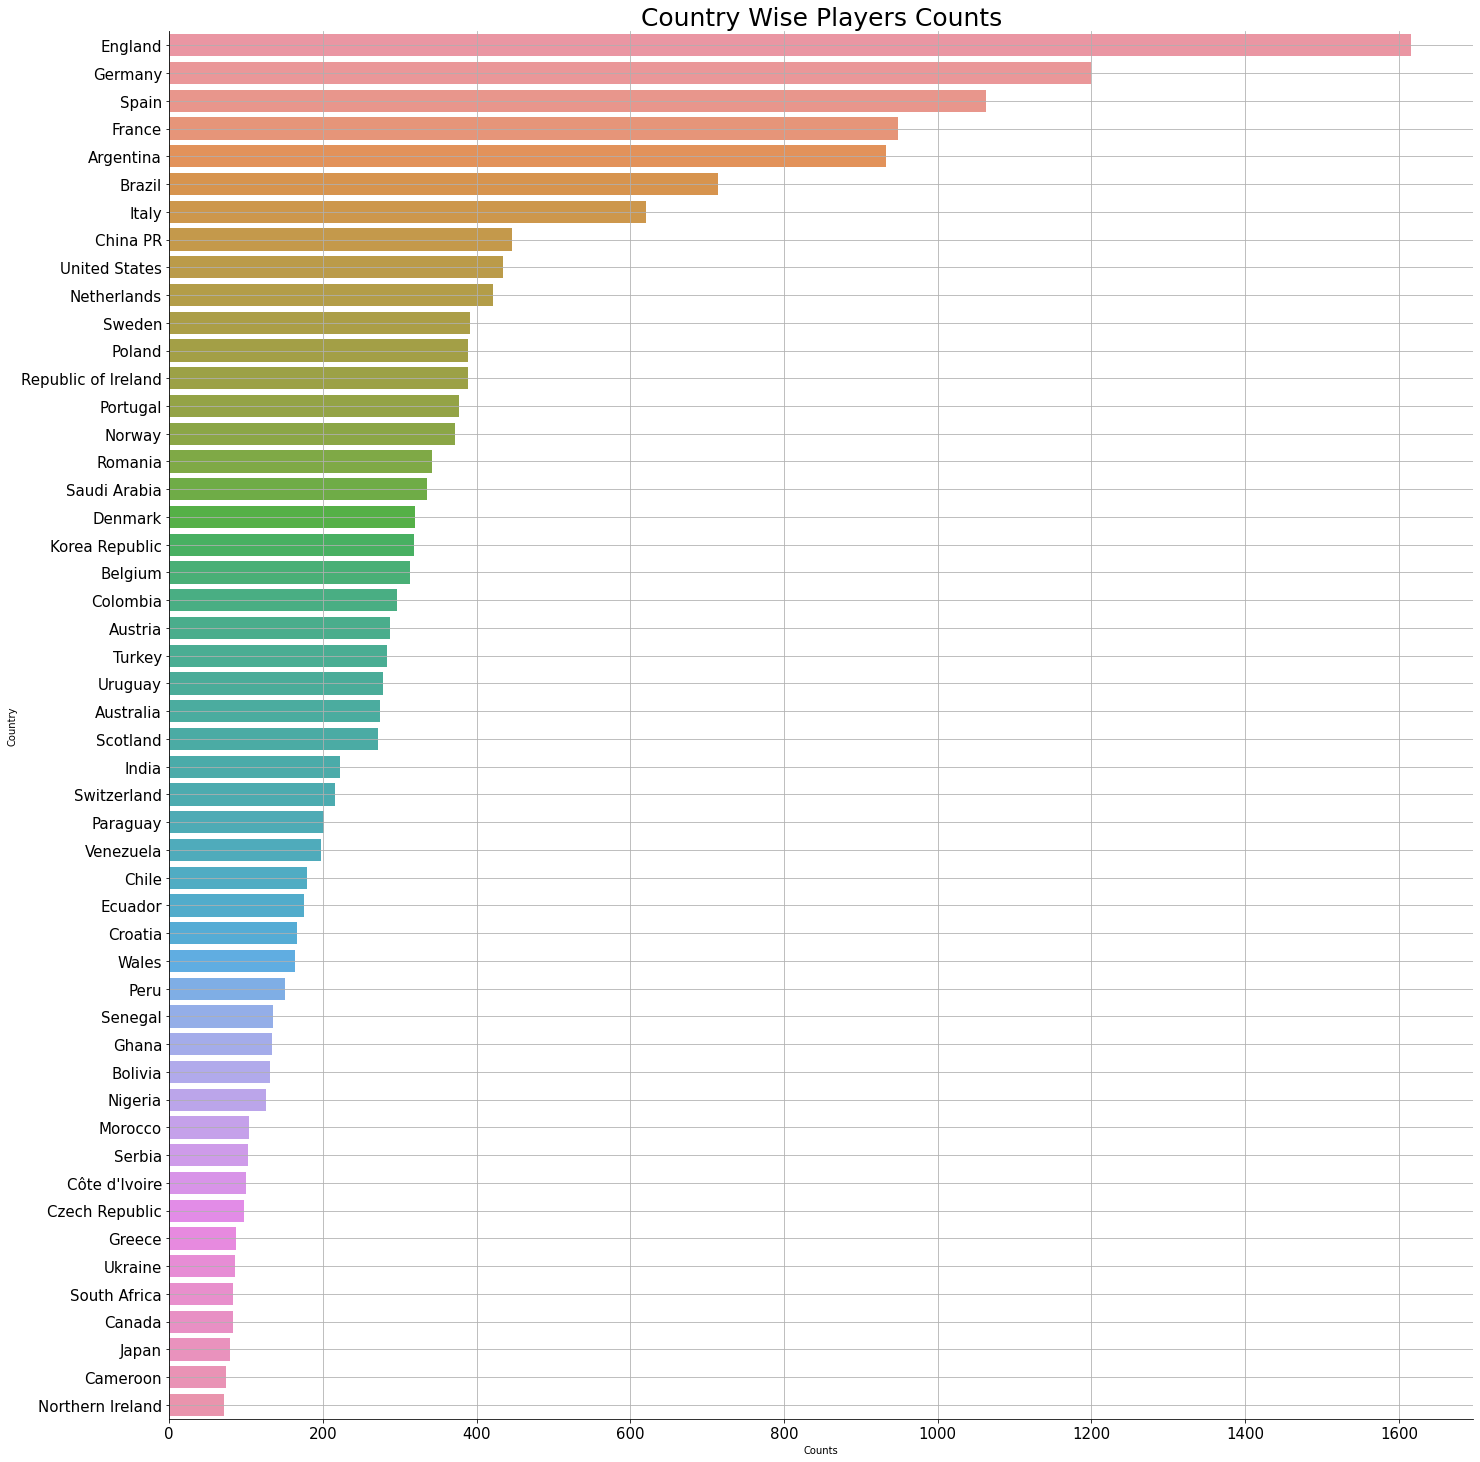

In [16]:
counts_Nationality = data["Country"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Country","Counts"]
sns.catplot(y="Country",x="Counts",data=counts_Nationality.head(50),height=20,kind="bar")
plt.title("Country Wise Players Counts",fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.show()